In [183]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm
from scipy import stats, polyval
plt.rcParams["font.family"] = "Times New Roman"

plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10,10)
# plt.rcParams["font.weight"] = 'bold'

%matplotlib inline


In [205]:
s1 = pd.read_csv('nampo.csv',encoding = 'cp949')
s1['time']=pd.date_range(start='2015-1-1-00', end='2019-12-31-23', freq = 'H')
s1=s1.dropna(axis=0) # 결측값 행 제거

# s1['PM2.5 Nampo']= s1['PM2.5 Nampo'].apply(pd.to_numeric, errors = 'coerce')
# s1= s1.astype(float)
# df['Gwang-bok'] = df['Gwang-bok'].apply(pd.to_numeric, errors='coerce')

s1


,year,month,day,hour,PM2.5 Nampo,PM10 Nampo,PM2.5 Gwangbok,PM10 Gwangbok,time
0,2015,1,1,0,15,25,11,19,2015-01-01 00:00:00
1,2015,1,1,1,17,38,9,21,2015-01-01 01:00:00
2,2015,1,1,2,16,20,8,19,2015-01-01 02:00:00
3,2015,1,1,3,10,17,7,22,2015-01-01 03:00:00
4,2015,1,1,4,4,11,10,26,2015-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...
43819,2019,12,31,19,12,19,12,16,2019-12-31 19:00:00
43820,2019,12,31,20,14,24,9,11,2019-12-31 20:00:00
43821,2019,12,31,21,12,13,10,7,2019-12-31 21:00:00
43822,2019,12,31,22,12,16,14,4,2019-12-31 22:00:00


In [206]:
def auto(df):
    df["Year"] = df["time"].dt.year
    df["time-month"] = df["time"].dt.month
    df["time-day"] = df["time"].dt.day
    df["time-hour"] = df["time"].dt.hour
    
    df['PM2.5 Nampo'] = df['PM2.5 Nampo'].apply(pd.to_numeric, errors='coerce')
    df['PM10 Nampo'] = df['PM10 Nampo'].apply(pd.to_numeric, errors='coerce')
    df['PM2.5 Gwangbok'] = df['PM2.5 Gwangbok'].apply(pd.to_numeric, errors='coerce')
    df['PM10 Gwangbok'] = df['PM10 Gwangbok'].apply(pd.to_numeric, errors='coerce')

    df = df[['PM2.5 Nampo','PM10 Nampo','PM2.5 Gwangbok','PM10 Gwangbok','year']]
    df.set_index('year', inplace = True)
    
    return df

s1 = auto(s1)
s1

,PM2.5 Nampo,PM10 Nampo,PM2.5 Gwangbok,PM10 Gwangbok
year,,,,
2015,15.0,25.0,11.0,19.0
2015,17.0,38.0,9.0,21.0
2015,16.0,20.0,8.0,19.0
2015,10.0,17.0,7.0,22.0
2015,4.0,11.0,10.0,26.0
...,...,...,...,...
2019,12.0,19.0,12.0,16.0
2019,14.0,24.0,9.0,11.0
2019,12.0,13.0,10.0,7.0


In [207]:
# s1=s1.dropna(axis=0) # 결측값 행 제거
# X=pd.DataFrame(s1['PM2.5 Nampo'])
# y = s1['PM2.5 Gwangbok']

# model = linear_model.LinearRegression(fit_intercept=False)
# model.fit(X=pd.DataFrame(s1['PM2.5 Nampo']), y= s1['PM2.5 Gwangbok'])
# prediction = model.predict(X=pd.DataFrame(s1['PM2.5 Nampo']))
# ax = plt.plot(X,model.predict(X))

# fit = model.fit(X=pd.DataFrame(s1['PM2.5 Nampo']), y= s1['PM2.5 Gwangbok'])
# print(round(fit.coef_[0],2))
# print(fit.score(X,y))


# Nampo vs 광복 (PM10, PM2.5)

r squared: 0.36592514845214874
기울기: [0.70436195]
y절편: 12.35965981149419
r squared: 0.15361798425960616
기울기: [0.46714459]
y절편: 12.327564680812962


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PM2.5 Nampo   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     8372.
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:34:55   Log-Likelihood:                -96498.
No. Observations:               23514   AIC:                         1.930e+05
Df Residuals:                   23512   BIC:                         1.930e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         11.3336      0.175     64.698      0.000      10.990      11.677
PM2.5 Gwangbok     0.5621      0.006     91.498      0.000       0.550       0.574
==============================================================================
Omnibus:                    58624.914   Durbin-Watson:                   1.165
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2017645334.197
Skew:                          26.806   Prob(JB):                         0.00
Kurtosis:                    1437.041   Cond. No.                         52.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

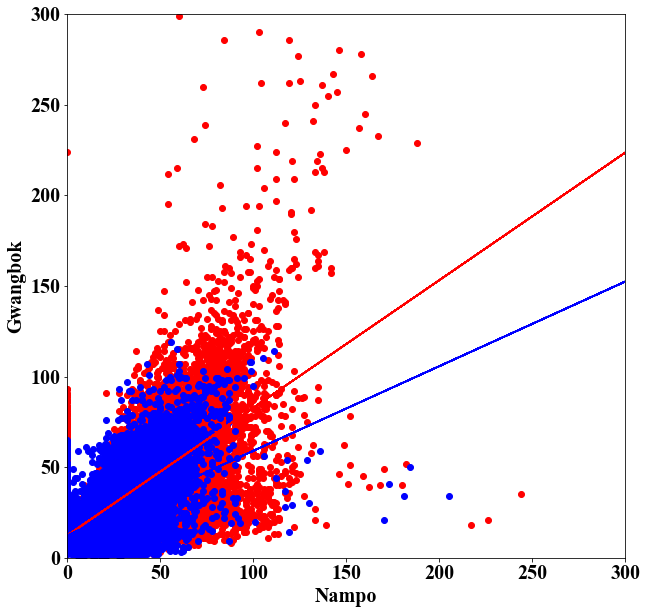

In [208]:
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["font.size"] = 20

# 전처리
s1 = s1.drop(s1[s1['PM10 Gwangbok']> 300].index)
s1 = s1.drop(s1[s1['PM10 Nampo']> 300].index)
s1=s1.dropna(axis=0) # 결측값 행 제거

y=s1['PM10 Gwangbok'] #
x=s1['PM10 Nampo']


# 선형회귀식
model = linear_model.LinearRegression()
model = model.fit(X=pd.DataFrame(x), y= y)
print('r squared: {}' .format(model.score(pd.DataFrame(x),y)))
print('기울기: {}' .format(model.coef_))
print('y절편: {}' .format(model.intercept_))

ax1 = plt.scatter(x, y, color="red")
ax1 = plt.plot(X,model.predict(X), color = 'red')





y2=s1['PM2.5 Gwangbok']
x2=s1['PM2.5 Nampo']

model2 = linear_model.LinearRegression()
model2 = model2.fit(X=pd.DataFrame(x2), y= y2)

print('r squared: {}' .format(model2.score(pd.DataFrame(x),y)))
print('기울기: {}' .format(model2.coef_))
print('y절편: {}' .format(model2.intercept_))

ax1 = plt.plot(X,model2.predict(X), color = 'blue')
ax1 = plt.scatter(x2, y2, color="blue")


# 축이름
plt.xlabel('Nampo')
plt.ylabel('Gwangbok')

plt.ylim(0,300)
plt.xlim(0,300)
# plt.legend()

# plt.show()
s1['intercept']=1
lm = sm.OLS(s1['PM2.5 Nampo'], s1[['intercept','PM2.5 Gwangbok']])
results = lm.fit()
results.summary()


In [209]:
s1['intercept']=1
lm2 = sm.OLS(s1['PM10 Gwangbok'], s1[['intercept','PM10 Nampo']])
results2 = lm2.fit()
results2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PM10 Gwangbok   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                 1.357e+04
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:35:23   Log-Likelihood:            -1.0215e+05
No. Observations:               23514   AIC:                         2.043e+05
Df Residuals:                   23512   BIC:                         2.043e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     12.3597      0.274     45.071      0.000      11.822      12.897
PM10 Nampo     0.7044      0.006    116.485      0.000       0.693       0.716
==============================================================================
Omnibus:                     8657.681   Durbin-Watson:                   0.478
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           151928.310
Skew:                           1.313   Prob(JB):                         0.00
Kurtosis:                      15.172   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Sasang vs 학장 (PM10, PM2.5)



r squared: 0.41155138812202496
기울기: [1.12000062]
y절편: 10.63871605643154
r squared: 0.403650232288709
기울기: [1.08007248]
y절편: 9.661767582307437


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          PM2.5 Hakjang   R-squared (uncentered):                   0.817
Model:                            OLS   Adj. R-squared (uncentered):              0.817
Method:                 Least Squares   F-statistic:                          7.583e+04
Date:                Tue, 14 Jul 2020   Prob (F-statistic):                        0.00
Time:                        12:49:32   Log-Likelihood:                         -69189.
No. Observations:               16998   AIC:                                  1.384e+05
Df Residuals:                   16997   BIC:                                  1.384e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
PM2.5 Sasang     1.5063      0.005    275.377      0.000       1.496       1.517
==============================================================================
Omnibus:                     3507.068   Durbin-Watson:                   0.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18138.197
Skew:                           0.902   Prob(JB):                         0.00
Kurtosis:                       7.728   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

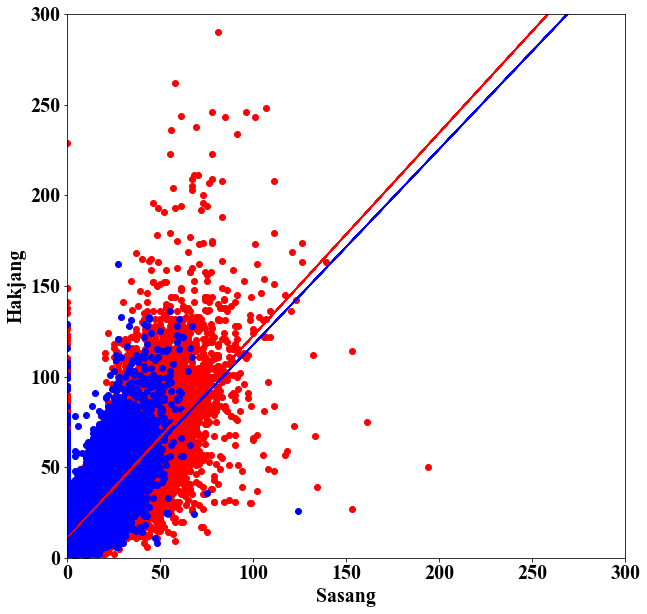

In [195]:
s1 = pd.read_csv('hakjang.csv')
s1['time']=pd.date_range(start='2015-1-1-00', end='2019-12-31-23', freq = 'H')



def auto(df):
    df["Year"] = df["time"].dt.year
    df["time-month"] = df["time"].dt.month
    df["time-day"] = df["time"].dt.day
    df["time-hour"] = df["time"].dt.hour
    
    df['PM2.5 Sasang'] = df['PM2.5 Sasang'].apply(pd.to_numeric, errors='coerce')
    df['PM10 Sasang'] = df['PM10 Sasang'].apply(pd.to_numeric, errors='coerce')
    df['PM2.5 Hakjang'] = df['PM2.5 Hakjang'].apply(pd.to_numeric, errors='coerce')
    df['PM10 Hakjang'] = df['PM10 Hakjang'].apply(pd.to_numeric, errors='coerce')

    df = df[['PM2.5 Sasang','PM10 Sasang','PM2.5 Hakjang','PM10 Hakjang','year']]
    df.set_index('year', inplace = True)
    
    return df
s1 = auto(s1)


plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['font.size'] = 20


# 전처리
s1 = s1.drop(s1[s1['PM10 Hakjang']> 300].index)
s1 = s1.drop(s1[s1['PM10 Sasang']> 300].index)
s1=s1.dropna(axis=0) # 결측값 행 제거

y=s1['PM10 Hakjang'] #
x=s1['PM10 Sasang']


# 선형회귀식
model = linear_model.LinearRegression()
model = model.fit(X=pd.DataFrame(x), y= y)

ax1 = plt.scatter(x, y, color="red")
ax1 = plt.plot(X,model.predict(X), color = 'red')

y2=s1['PM2.5 Hakjang']
x2=s1['PM2.5 Sasang']

model2 = linear_model.LinearRegression()
model2 = model2.fit(X=pd.DataFrame(x2), y= y2)
print('r squared: {}' .format(model.score(pd.DataFrame(x),y)))
print('기울기: {}' .format(model.coef_))
print('y절편: {}' .format(model.intercept_))
print('r squared: {}' .format(model2.score(pd.DataFrame(x),y)))
print('기울기: {}' .format(model2.coef_))
print('y절편: {}' .format(model2.intercept_))
ax1 = plt.plot(X,model2.predict(X), color = 'blue')
ax1 = plt.scatter(x2, y2, color="blue")
plt.xlabel('Sasang')
plt.ylabel('Hakjang')


plt.ylim(0,300)
plt.xlim(0,300)
# plt.legend()

# plt.show()
lm = sm.OLS(s1['PM2.5 Hakjang'], s1[['PM2.5 Sasang']])
results = lm.fit()
results.summary()


In [182]:
lm2 = sm.OLS(s1['PM10 Hakjang'], s1[['PM10 Sasang']])
results2 = lm2.fit()
results2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           PM10 Hakjang   R-squared (uncentered):                   0.851
Model:                            OLS   Adj. R-squared (uncentered):              0.851
Method:                 Least Squares   F-statistic:                          9.740e+04
Date:                Tue, 14 Jul 2020   Prob (F-statistic):                        0.00
Time:                        12:31:34   Log-Likelihood:                         -75710.
No. Observations:               16998   AIC:                                  1.514e+05
Df Residuals:                   16997   BIC:                                  1.514e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
PM10 Sasang     1.3888      0.004    312.097      0.000       1.380       1.398
==============================================================================
Omnibus:                     4870.528   Durbin-Watson:                   0.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49502.938
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                      11.075   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# S-1-w vs Jeonpo (PM10, PM2.5)

In [211]:
s1 = pd.read_csv('Jeonpo.csv')
s1['time']=pd.date_range(start='2015-1-1-00', end='2019-12-31-23', freq = 'H')




def auto(df):
    df["Year"] = df["time"].dt.year
    df["time-month"] = df["time"].dt.month
    df["time-day"] = df["time"].dt.day
    df["time-hour"] = df["time"].dt.hour
    
    df['S-1-p PM2.5'] = df['S-1-p PM2.5'].apply(pd.to_numeric, errors='coerce')
    df['S-1-p PM10'] = df['S-1-p PM10'].apply(pd.to_numeric, errors='coerce')
    
    df['S-1-w PM2.5'] = df['S-1-w PM2.5'].apply(pd.to_numeric, errors='coerce')
    df['S-1-w PM10'] = df['S-1-w PM10'].apply(pd.to_numeric, errors='coerce')
    
    df['S-2-p PM2.5'] = df['S-2-p PM2.5'].apply(pd.to_numeric, errors='coerce')
    df['S-2-p PM10'] = df['S-2-p PM10'].apply(pd.to_numeric, errors='coerce')

    df['S-2-w PM2.5'] = df['S-2-w PM2.5'].apply(pd.to_numeric, errors='coerce')
    df['S-2-w PM10'] = df['S-2-w PM10'].apply(pd.to_numeric, errors='coerce')
    
    df['PM2.5 Jeonpo'] = df['PM2.5 Jeonpo'].apply(pd.to_numeric, errors='coerce')
    df['PM10 Jeonpo'] = df['PM10 Jeonpo'].apply(pd.to_numeric, errors='coerce')
    
    
#     df = df.drop(s1[s1['PM10 Jeonpo']> 300].index)
#     df = df.drop(s1[s1['PM2.5 Jeonpo']> 200].index)
#     df = df.drop(s1[s1['S-1-p PM2.5']> 200].index)
#     df = df.drop(s1[s1['S-2-p PM2.5']> 200].index)
#     df = df.drop(s1[s1['S-1-w PM2.5']> 200].index)
#     df = df.drop(s1[s1['S-2-w PM2.5']> 200].index)
#     df = df.drop(s1[s1['S-1-p PM10']> 300].index)
#     df = df.drop(s1[s1['S-2-p PM10']> 300].index)
#     df = df.drop(s1[s1['S-1-w PM10']> 300].index)
#     df = df.drop(s1[s1['S-2-w PM10']> 300].index)
    df = df.dropna(axis=0) # 결측값 행 제거
    
    df = df[['S-1-p PM2.5','S-1-p PM10','S-1-w PM2.5','S-1-w PM10','S-2-p PM2.5','S-2-p PM10','S-2-w PM2.5','S-2-w PM10','PM2.5 Jeonpo','PM10 Jeonpo','year']]
    df.set_index('year', inplace = True)
    
    return df
s1 = auto(s1)



r squared: 0.32457049923156134
기울기: [0.66729357]
y절편: 14.116025392585762
r squared: -0.1636527968646515
기울기: [0.2201315]
y절편: 18.554319395101366


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           PM2.5 Jeonpo   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     6771.
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:37:19   Log-Likelihood:            -1.6364e+05
No. Observations:               39853   AIC:                         3.273e+05
Df Residuals:                   39851   BIC:                         3.273e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      18.5543      0.101    184.617      0.000      18.357      18.751
S-1-w PM2.5     0.2201      0.003     82.286      0.000       0.215       0.225
==============================================================================
Omnibus:                    13609.176   Durbin-Watson:                   0.354
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1029410.709
Skew:                          -0.760   Prob(JB):                         0.00
Kurtosis:                      27.852   Cond. No.                         51.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

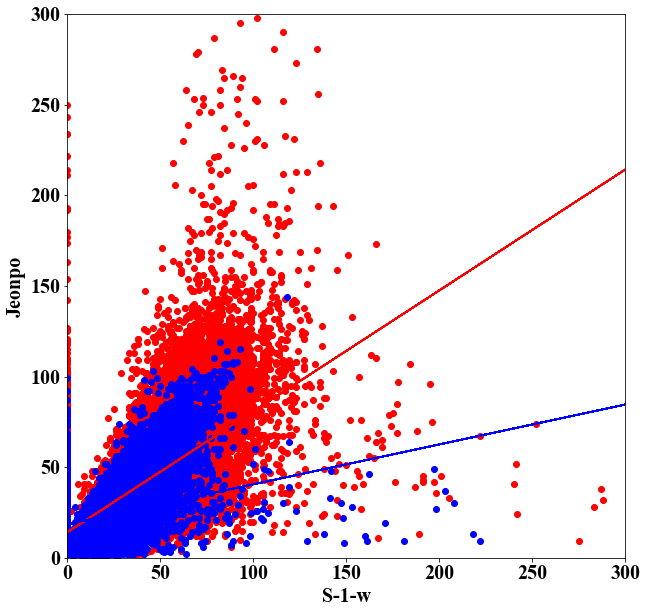

In [212]:
y=s1['PM10 Jeonpo'] #
x=s1['S-1-w PM10']

plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['font.size'] = 20

# 선형회귀식
model = linear_model.LinearRegression()
model = model.fit(X=pd.DataFrame(x), y= y)

ax1 = plt.scatter(x, y, color="red")
ax1 = plt.plot(X,model.predict(X), color = 'red')

y2=s1['PM2.5 Jeonpo'] #
x2=s1['S-1-w PM2.5']

model2 = linear_model.LinearRegression()
model2 = model2.fit(X=pd.DataFrame(x2), y= y2)
ax1 = plt.plot(X,model2.predict(X), color = 'blue')
ax1 = plt.scatter(x2, y2, color="blue")
plt.xlabel('S-1-w')
plt.ylabel('Jeonpo')

print('r squared: {}' .format(model.score(pd.DataFrame(x),y)))
print('기울기: {}' .format(model.coef_))
print('y절편: {}' .format(model.intercept_))
print('r squared: {}' .format(model2.score(pd.DataFrame(x),y)))
print('기울기: {}' .format(model2.coef_))
print('y절편: {}' .format(model2.intercept_))
plt.ylim(0,300)
plt.xlim(0,300)
# plt.legend()

# plt.show()
s1['intercept'] = 1
lm = sm.OLS(s1['PM2.5 Jeonpo'], s1[['intercept','S-1-w PM2.5']])
results = lm.fit()
results.summary()



In [213]:
s1['intercept'] = 1
lm2 = sm.OLS(s1['PM10 Jeonpo'], s1[['intercept','S-1-w PM10']])
results2 = lm2.fit()
results2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PM10 Jeonpo   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                 1.915e+04
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:37:20   Log-Likelihood:            -1.7859e+05
No. Observations:               39853   AIC:                         3.572e+05
Df Residuals:                   39851   BIC:                         3.572e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     14.1160      0.237     59.436      0.000      13.651      14.582
S-1-w PM10     0.6673      0.005    138.383      0.000       0.658       0.677
==============================================================================
Omnibus:                    15457.463   Durbin-Watson:                   0.439
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9354196.468
Skew:                          -0.371   Prob(JB):                         0.00
Kurtosis:                      78.051   Cond. No.                         109.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# S-1-p vs Jeonpo (PM10, PM2.5)

r squared: 0.11099160077318626
기울기: [0.20396894]
y절편: 34.43974580556645
r squared: -0.17585338791305372
기울기: [0.28235342]
y절편: 17.450759887803486


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           PM2.5 Jeonpo   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     9474.
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        14:07:36   Log-Likelihood:            -1.6252e+05
No. Observations:               39853   AIC:                         3.250e+05
Df Residuals:                   39851   BIC:                         3.251e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      17.4508      0.100    175.318      0.000      17.256      17.646
S-1-p PM2.5     0.2824      0.003     97.335      0.000       0.277       0.288
==============================================================================
Omnibus:                    22974.779   Durbin-Watson:                   0.422
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3986293.250
Skew:                          -1.724   Prob(JB):                         0.00
Kurtosis:                      51.874   Cond. No.                         47.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

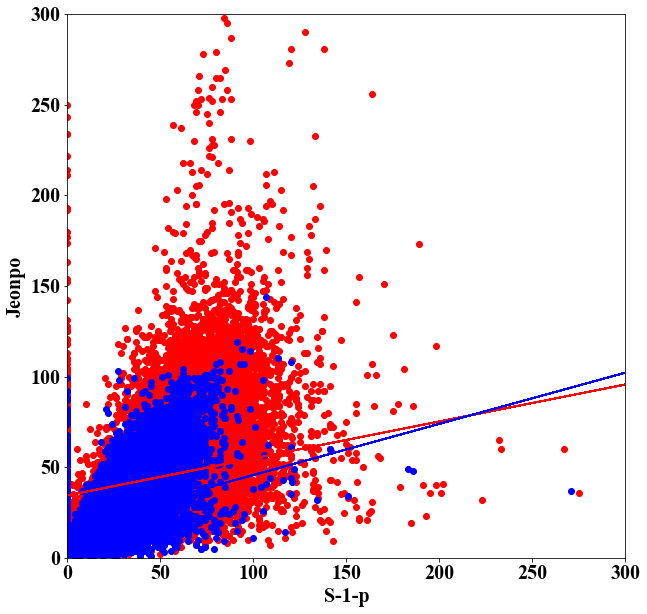

In [221]:
y=s1['PM10 Jeonpo'] #
x=s1['S-1-p PM10']

plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['font.size'] = 20

# 선형회귀식
model = linear_model.LinearRegression()
model = model.fit(X=pd.DataFrame(x), y= y)

ax1 = plt.scatter(x, y, color="red")
ax1 = plt.plot(X,model.predict(X), color = 'red')

y2=s1['PM2.5 Jeonpo'] #
x2=s1['S-1-p PM2.5']

model2 = linear_model.LinearRegression()
model2 = model2.fit(X=pd.DataFrame(x2), y= y2)
ax1 = plt.plot(X,model2.predict(X), color = 'blue')
ax1 = plt.scatter(x2, y2, color="blue")
plt.xlabel('S-1-p')
plt.ylabel('Jeonpo')

print('r squared: {}' .format(model.score(pd.DataFrame(x),y)))
print('기울기: {}' .format(model.coef_))
print('y절편: {}' .format(model.intercept_))
print('r squared: {}' .format(model2.score(pd.DataFrame(x),y)))
print('기울기: {}' .format(model2.coef_))
print('y절편: {}' .format(model2.intercept_))
plt.ylim(0,300)
plt.xlim(0,300)
# plt.legend()

# plt.show()
s1['intercept'] = 1
lm = sm.OLS(s1['PM2.5 Jeonpo'], s1[['intercept','S-1-p PM2.5']])
results = lm.fit()
results.summary()



In [223]:
s1['intercept'] = 1
lm2 = sm.OLS(s1['PM10 Jeonpo'], s1[['intercept','S-1-p PM10']])
results2 = lm2.fit()
results2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PM10 Jeonpo   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     4975.
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        14:11:01   Log-Likelihood:            -1.8406e+05
No. Observations:               39853   AIC:                         3.681e+05
Df Residuals:                   39851   BIC:                         3.681e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.4397      0.177    194.308      0.000      34.092      34.787
S-1-p PM10     0.2040      0.003     70.536      0.000       0.198       0.210
==============================================================================
Omnibus:                    14097.806   Durbin-Watson:                   0.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1031960.245
Skew:                           0.833   Prob(JB):                         0.00
Kurtosis:                      27.873   Cond. No.                         88.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# S-2-w vs Jeonpo (PM10, PM2.5)

r squared: 0.3401137126245364
기울기: [0.66719298]
y절편: 15.931660758912827
r squared: -0.08271269983591267
기울기: [0.28510393]
y절편: 17.181594403694945


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           PM2.5 Jeonpo   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     9700.
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:38:24   Log-Likelihood:            -1.6243e+05
No. Observations:               39853   AIC:                         3.249e+05
Df Residuals:                   39851   BIC:                         3.249e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      17.1816      0.101    170.508      0.000      16.984      17.379
S-2-w PM2.5     0.2851      0.003     98.490      0.000       0.279       0.291
==============================================================================
Omnibus:                    27001.799   Durbin-Watson:                   0.430
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5741528.695
Skew:                          -2.228   Prob(JB):                         0.00
Kurtosis:                      61.632   Cond. No.                         49.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

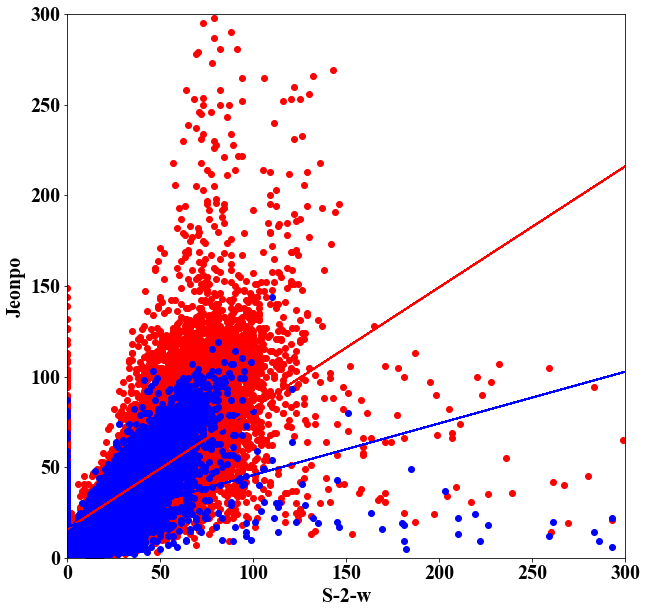

In [217]:
y=s1['PM10 Jeonpo'] #
x=s1['S-2-w PM10']


# 선형회귀식
model = linear_model.LinearRegression()
model = model.fit(X=pd.DataFrame(x), y= y)

ax1 = plt.scatter(x, y, color="red")
ax1 = plt.plot(X,model.predict(X), color = 'red')

y2=s1['PM2.5 Jeonpo'] #
x2=s1['S-2-w PM2.5']

model2 = linear_model.LinearRegression()
model2 = model2.fit(X=pd.DataFrame(x2), y= y2)
ax1 = plt.plot(X,model2.predict(X), color = 'blue')
ax1 = plt.scatter(x2, y2, color="blue")
plt.xlabel('S-2-w')
plt.ylabel('Jeonpo')

print('r squared: {}' .format(model.score(pd.DataFrame(x),y)))
print('기울기: {}' .format(model.coef_))
print('y절편: {}' .format(model.intercept_))
print('r squared: {}' .format(model2.score(pd.DataFrame(x),y)))
print('기울기: {}' .format(model2.coef_))
print('y절편: {}' .format(model2.intercept_))

plt.ylim(0,300)
plt.xlim(0,300)
# plt.legend()

# plt.show()
s1['intercept'] = 1
lm = sm.OLS(s1['PM2.5 Jeonpo'], s1[['intercept','S-2-w PM2.5']])
results = lm.fit()
results.summary()



In [218]:
s1['intercept'] = 1
lm = sm.OLS(s1['PM10 Jeonpo'], s1[['intercept','S-2-w PM10']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PM10 Jeonpo   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                 2.054e+04
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:38:34   Log-Likelihood:            -1.7812e+05
No. Observations:               39853   AIC:                         3.563e+05
Df Residuals:                   39851   BIC:                         3.563e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     15.9317      0.219     72.661      0.000      15.502      16.361
S-2-w PM10     0.6672      0.005    143.317      0.000       0.658       0.676
==============================================================================
Omnibus:                    21896.370   Durbin-Watson:                   0.501
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12976521.426
Skew:                          -1.285   Prob(JB):                         0.00
Kurtosis:                      91.363   Cond. No.                         97.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# S-2-p vs Jeonpo (PM10, PM2.5)

r squared: 0.3013112422800266
기울기: [0.59139795]
y절편: 21.375852933487334
r squared: 0.12626387041018383
기울기: [0.61285134]
y절편: 9.705919867792437


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           PM2.5 Jeonpo   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                 2.907e+04
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:43:50   Log-Likelihood:            -1.5585e+05
No. Observations:               39853   AIC:                         3.117e+05
Df Residuals:                   39851   BIC:                         3.117e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       9.7059      0.104     93.062      0.000       9.501       9.910
S-2-p PM2.5     0.6129      0.004    170.491      0.000       0.606       0.620
==============================================================================
Omnibus:                    69085.611   Durbin-Watson:                   0.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        505178918.807
Skew:                         -11.386   Prob(JB):                         0.00
Kurtosis:                     554.096   Cond. No.                         50.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

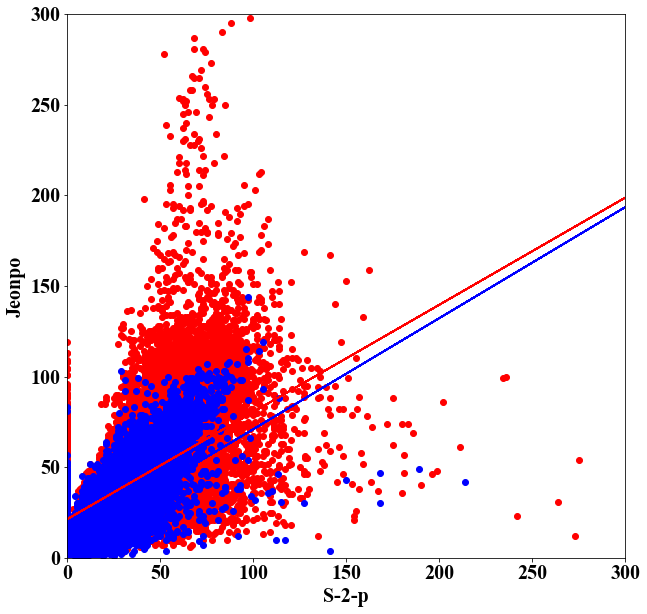

In [219]:
y=s1['PM10 Jeonpo'] #
x=s1['S-2-p PM10']


# 선형회귀식
model = linear_model.LinearRegression()
model = model.fit(X=pd.DataFrame(x), y= y)

ax1 = plt.scatter(x, y, color="red")
ax1 = plt.plot(X,model.predict(X), color = 'red')

y2=s1['PM2.5 Jeonpo'] #
x2=s1['S-2-p PM2.5']

model2 = linear_model.LinearRegression()
model2 = model2.fit(X=pd.DataFrame(x2), y= y2)
ax1 = plt.plot(X,model2.predict(X), color = 'blue')
ax1 = plt.scatter(x2, y2, color="blue")
plt.xlabel('S-2-p')
plt.ylabel('Jeonpo')

print('r squared: {}' .format(model.score(pd.DataFrame(x),y)))
print('기울기: {}' .format(model.coef_))
print('y절편: {}' .format(model.intercept_))
print('r squared: {}' .format(model2.score(pd.DataFrame(x),y)))
print('기울기: {}' .format(model2.coef_))
print('y절편: {}' .format(model2.intercept_))

plt.ylim(0,300)
plt.xlim(0,300)
# plt.legend()

# plt.show()
s1['intercept'] = 1
lm = sm.OLS(s1['PM2.5 Jeonpo'], s1[['intercept','S-2-p PM2.5']])
results = lm.fit()
results.summary()



In [220]:
s1['intercept'] = 1
lm = sm.OLS(s1['PM10 Jeonpo'], s1[['intercept','S-2-p PM10']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PM10 Jeonpo   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                 1.719e+04
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:44:00   Log-Likelihood:            -1.7926e+05
No. Observations:               39853   AIC:                         3.585e+05
Df Residuals:                   39851   BIC:                         3.585e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     21.3759      0.201    106.589      0.000      20.983      21.769
S-2-p PM10     0.5914      0.005    131.095      0.000       0.583       0.600
==============================================================================
Omnibus:                    31667.802   Durbin-Watson:                   0.495
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         46125192.126
Skew:                          -2.443   Prob(JB):                         0.00
Kurtosis:                     169.593   Cond. No.                         81.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""